In [1]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi
X[:,0], X[:, 1] = np.cos(angles), np.sin(angles)
X += 0.28 * np.random.randn(m ,3)
X = Rotation.from_rotvec([np.pi /29, -np.pi /20, np.pi/4]).apply(X)
X += [0.2, 0, 0.2]

X

array([[-0.36044079, -1.29387867, -0.19289405],
       [-0.60386027,  0.4526088 , -0.31278085],
       [ 1.34681758,  0.11782937,  0.14274642],
       [ 0.62729385, -0.55727135,  0.42084942],
       [-0.59055876, -0.94958122,  0.06366505],
       [-0.1884097 , -0.60758249,  0.01146068],
       [-0.49592156, -1.18122089,  0.1738277 ],
       [ 0.28578766,  1.18265016,  0.68157246],
       [ 0.94193415, -0.90196631,  0.2361048 ],
       [ 1.45142206,  0.09472771,  0.78841168],
       [-1.17305512, -1.04624473, -0.08061183],
       [-0.78593812, -0.17837585, -0.49504508],
       [ 0.33134818,  0.90457383,  0.77742378],
       [-0.37841637, -0.9735486 , -0.15581829],
       [-0.34106331, -0.45488212, -0.07801703],
       [-0.41469568, -0.64449064,  0.31141758],
       [-0.42102357, -0.99131524, -0.13173236],
       [-0.01990797, -1.21886132,  0.05931754],
       [ 0.02315261, -0.93170356, -0.36853916],
       [-0.36939455, -0.90914025, -0.23034033],
       [ 0.64838106, -0.82143906,  0.653

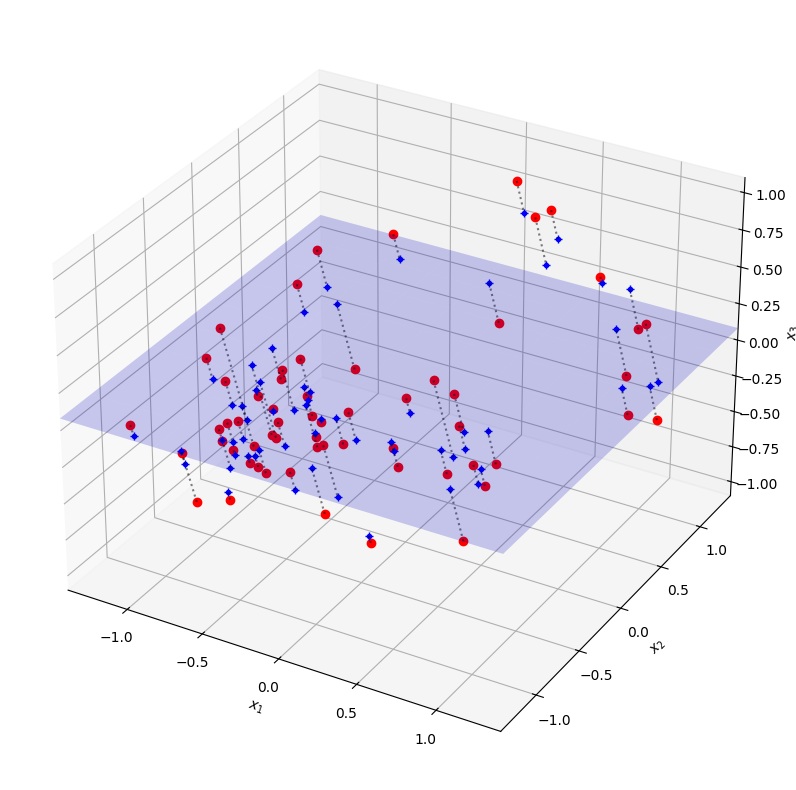

In [2]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X3D_inv = pca.inverse_transform(X2D)

axes= [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
X_above = X[X[:, 2] >= X3D_inv[:, 2]]
X_below = X[X[:,2] < X3D_inv[:, 2]]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.axis([-1.4, 1.4, -1.4, 1.4, -1.1, 1.1])

ax.plot(X[:, 0], X[:, 1], X[:, 2], 'ro')
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], 'b+')
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], 'b.')
ax.set_xlabel('$x_1$')
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$", rotation=0)

for i in range(m):
    ax.plot([X[i, 0], X3D_inv[i, 0]], 
            [X[i, 1], X3D_inv[i, 1]],
            [X[i, 2], X3D_inv[i, 2]], 'k:', alpha=0.5)

x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))

z = np.full_like(x1, pca.mean_[2])
ax.plot_surface(x1, x2, z, color='blue', alpha=0.2)

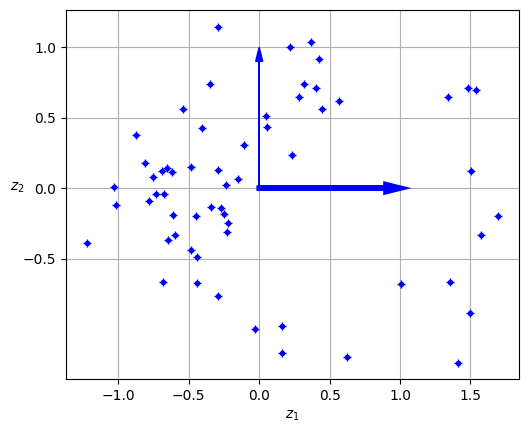

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.arrow(
    0,
    0,
    1,
    0,
    head_width=0.05,
    length_includes_head=True,
    head_length=0.1,
    fc="b",
    ec="b",
    linewidth=4,
)
ax.arrow(
    0,
    0,
    0,
    1,
    head_width=0.05,
    length_includes_head=True,
    head_length=0.1,
    fc="b",
    ec="b",
    linewidth=1,
)
ax.set_xlabel('$z_1$')
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel('$z_2$', rotation=0)
ax.set_axisbelow(True)
ax.grid()

In [4]:
from sklearn.datasets import make_swiss_roll

x_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

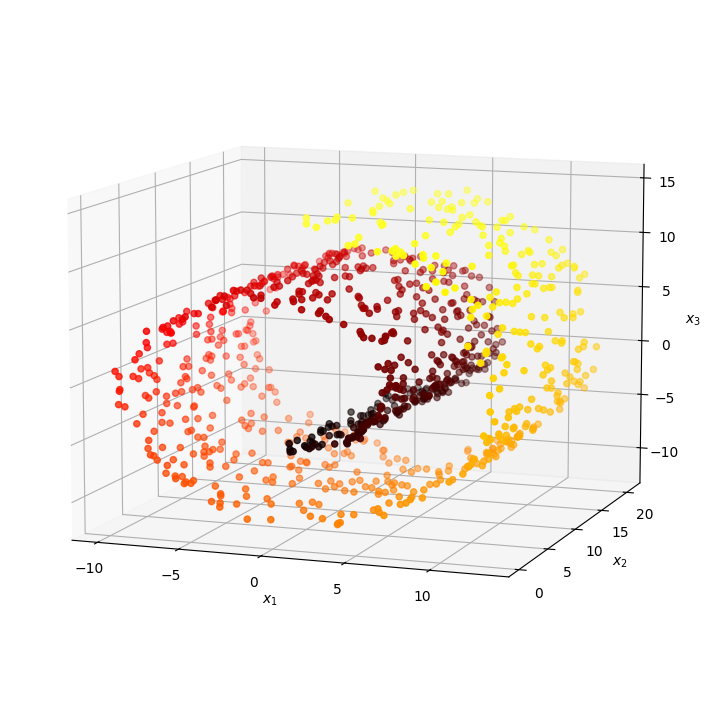

In [112]:
from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel('$x_1$', rotation=0)
ax.set_ylabel('$x_2$', rotation=0)
ax.set_zlabel('$x_3$', rotation=0)

ax.scatter(x_swiss[:, 0], x_swiss[:, 1], x_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
plt.show()

In [6]:
import numpy as np

X_centered = X - X.mean(axis=0)
U, S, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]

In [7]:
m, n = X.shape
Sigma = np.zeros_like(X_centered)
Sigma[:n, :n] = np.diag(S)
assert np.allclose(X_centered, U @ Sigma @ Vt)

In [8]:
W2 = Vt[:2].T
X2D = X_centered @ W2

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [10]:
pca.components_

array([[ 0.67291313,  0.70597236,  0.22088672],
       [ 0.73251346, -0.67753858, -0.06607197]])

In [11]:
pca.explained_variance_ratio_

array([0.58776194, 0.34244861])

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml("mnist_784", as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=0.3, random_state=42
)

In [13]:
pca = PCA(random_state=42)
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [14]:
pca = PCA(n_components=0.85)
X_reduced = pca.fit_transform(X_train)

In [15]:
pca.n_components_

np.int64(59)

In [16]:
pca.explained_variance_ratio_.sum()

np.float64(0.8511176731206338)

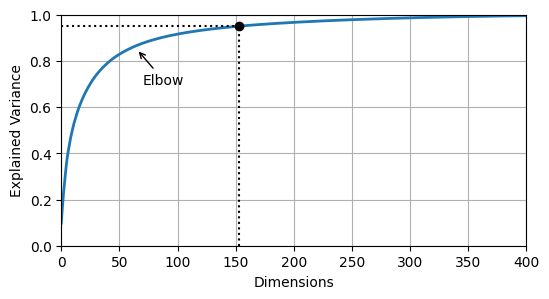

In [17]:
plt.figure(figsize=(6, 3))
plt.plot(cumsum, linewidth=2)
plt.axis([0, 400, 0.0, 1.0])
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7), arrowprops=dict(arrowstyle="->"))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
    PCA(random_state=42),
    RandomForestClassifier(random_state=42),
)

param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500),
}

rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state=42)

rnd_search.fit(X_train[:1000], y_train[:1000])

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'pca__n_components': array([10, 11... 78, 79]), 'randomforestclassifier__n_estimators': array([ 50, ...97, 498, 499])}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [21]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': np.int64(475),
 'pca__n_components': np.int64(57)}

In [22]:
pca = PCA(0.85)
X_reduced = pca.fit_transform(X_train, y_train)

In [23]:
X_recovered = pca.inverse_transform(X_reduced)

## Randomized PCA

In [24]:
rnd_pca = PCA(n_components=154, svd_solver='randomized', random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

In [27]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100

inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

inc_pca.transform(X_train)

e:\code\AI-ML\PCA\env\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


array([[ 1.30185073e+03,  2.66358470e+00, -1.11239327e+03, ...,
        -3.80573058e+01, -5.02035739e+01, -8.68917875e+01],
       [ 2.23905355e+02, -7.58356569e+02,  2.04006361e+02, ...,
        -9.89751953e+01,  1.83962960e+01, -1.00061800e+00],
       [-3.19314780e+02, -4.49021522e+02, -1.02263959e+02, ...,
        -8.11720876e+01,  4.49709943e+01,  3.60907721e+01],
       ...,
       [-9.78878935e+02,  3.72940002e+02, -7.41174091e+00, ...,
        -9.73836545e+00, -2.85648196e+01, -8.95096801e+00],
       [ 1.21603263e+03,  4.15113302e+02, -7.85669238e+02, ...,
        -1.66390221e+01,  4.12779032e+00,  2.32675643e+01],
       [ 7.86168234e+02,  1.06740451e+03, -8.14162687e+02, ...,
         5.83024793e+01,  5.56911678e+01, -4.53294264e+01]],
      shape=(49000, 154))

# Randomized Projection

In [37]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, n = 5000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=n)

In [38]:
d

np.int64(7300)

In [39]:
d = int(4 * np.log(m) / (n ** 2 / 2 - n ** 3 / 3))
d

7300

In [41]:
p = 20000
np.random.seed(42)
r = np.random.randn(d, p) / np.sqrt(d)

X = np.random.randn(m, p)
X_reduced = X @ r.T

In [42]:
from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps=n, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X)

In [43]:
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)
X_recovered = X_reduced @ components_pinv.T

In [45]:
from sklearn.random_projection import SparseRandomProjection

print("GaussianRandomProjection fit")
%timeit GaussianRandomProjection(random_state=42).fit(X)
print('SparseRandomProjection fit')
%timeit SparseRandomProjection(random_state=42).fit(X)

gaussian_rnd_proj = GaussianRandomProjection(random_state=42).fit(X)
sparse_rnd_proj = SparseRandomProjection(random_state=42).fit(X)
print("GaussianRandomProjection tranform")
%timeit gaussian_rnd_proj.transform(X)
print("SparseRandomProjection transform")
%timeit sparse_rnd_proj.transform(X)

GaussianRandomProjection fit
3.02 s ± 40.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection fit
1.97 s ± 7.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
GaussianRandomProjection tranform
12.4 s ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection transform
5.87 s ± 1.04 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# LLE

In [67]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding


X_swiss_roll, color = make_swiss_roll(n_samples=1500, noise=0.1, random_state=42)
lle = LocallyLinearEmbedding(n_neighbors=12, n_components=2, random_state=42)
unrolled_swiss_roll = lle.fit_transform(X_swiss_roll)

(np.float64(-0.05), np.float64(0.06), np.float64(-0.065), np.float64(0.08))

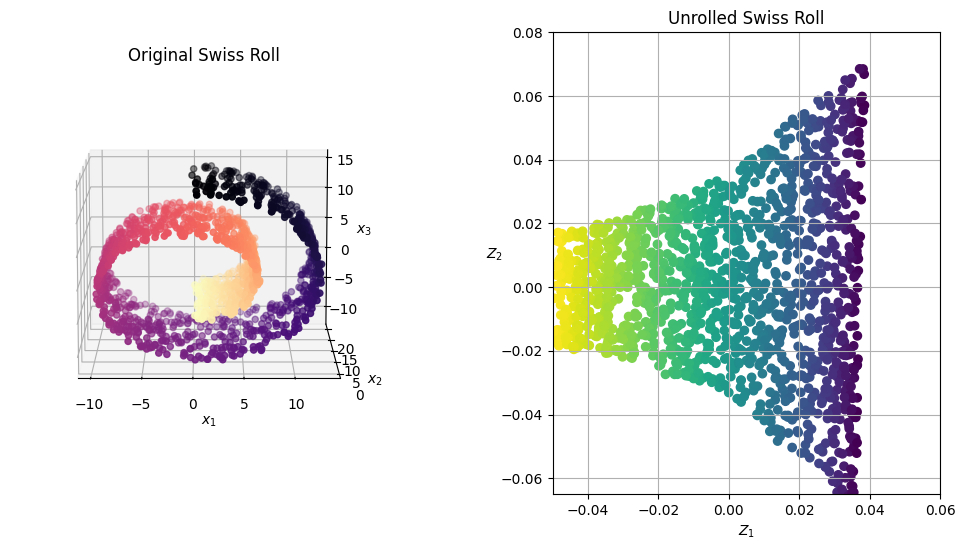

In [118]:
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.4) 

ax1 = fig.add_subplot(1,2,1, projection='3d')
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(
    X_swiss_roll[:,0], X_swiss_roll[:, 1], X_swiss_roll[:, 2], c=color, cmap=plt.cm.magma_r
)
ax1.xaxis.set_rotate_label(False)
ax1.yaxis.set_rotate_label(False)
ax1.zaxis.set_rotate_label(False)
ax1.set_xlabel("$x_1$", rotation=0)
ax1.set_ylabel("$x_2$", rotation=0)
ax1.set_zlabel("$x_3$", rotation=0)
ax1.set_title("Original Swiss Roll")
ax1.view_init(10, -90)

# Axis 2 view
ax2.scatter(
    unrolled_swiss_roll[:, 0], unrolled_swiss_roll[:, 1], c=color
)
ax2.grid()
ax2.set_xlabel("$Z_1$")
ax2.set_ylabel("$Z_2$", rotation=0)
ax2.set_title("Unrolled Swiss Roll")
ax2.axis([-0.05, 0.06, -0.065, 0.08])